# Break even analysis

# Revenues

1. Acording to this [NSI 2021 Census analysis](https://www.nsi.bg/sites/default/files/files/pressreleases/Census2021-ethnos.pdf) the roma minority group in Bulgaria is 266 720, from which 14 % have secondary education and 41 % have primary education, respectively **37 341** and **109 355**.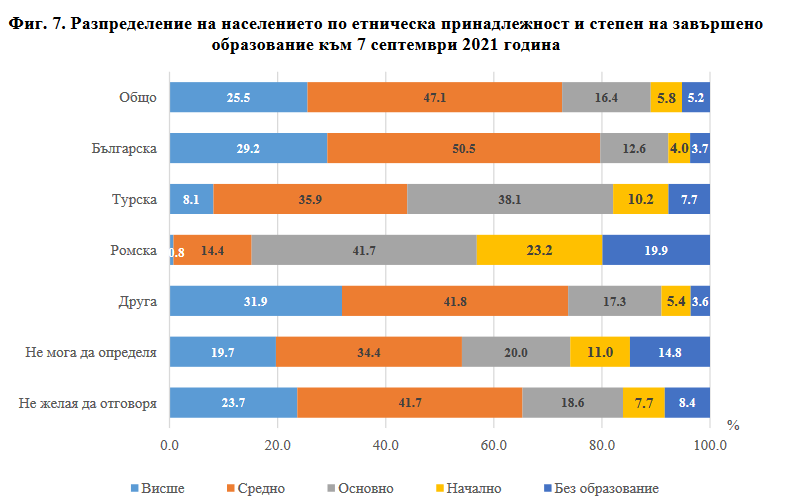

2. Acording to this [site for qualifications](https://zbut-academy.bg/obuchenie/kurs-zavarchik/) the trainees must obay the *Regulation for Conditions and Procedure for acquisition and recognition of welding competence*, which states that they must have passed **6-th** grade (**secondary edication**) and be **16 years old** or successfully completed a literacy course under the Employment Promotion Act (EPA). This site also gives us information of a course price: **600 leva**.
    
        -> The 90 % confidence interval for number of potencial trainees becomes: [0, 140000]

3. This is too broad, we need to see how much market demand there is. In the most popular [bulgarian site for job searching](https://www.jobs.bg/front_job_search.php?subm=1&keywords%5B%5D=%D0%B7%D0%B0%D0%B2%D0%B0%D1%80%D1%87%D0%B8%D0%BA) there are **100 job offerings!**. Looking at the [National Employment Agency](https://www.az.government.bg/bg/ejobs/prl_list/) we see similar job listnings. If we assume that there are about 200 **official** job listnings and the other assumption is that around **3** people are needed, we conclude that the interval becomes:

        -> The 90 % confidence interval for number of potencial trainees becomes: [0, 600]

4. Let's look at pricing this course. From point 1. the price was **600 leva**. [Another site](https://www.davitoz.org/kursove-za-zavarchik/) gives us a price of 956 leva (if you pay the lump sum) or **1056 leva** (that can be split in two payments of 528) for individual training course and for a group training the price is, of course lower. The minimum price we could find is 300 leva, which seems too low, however we will use it as a lower boundary.

        -> The 90 % confidence interval for number of potencial course price: [300, 1056]

5. Let's give some success rate intervals for students to finish our course. Acording to ["Massive open online course completion rates revisited: Assessment, length and attrition", by Katy Jordan](https://www.researchgate.net/publication/308391574_Massive_open_online_course_completion_rates_revisited_Assessment_length_and_attrition), we will use those results:

*"Completion rates (defined as the percentage of enrolled students who completed the course) vary from 0.7% to 52.1%, with a median value of 12.6%."*

        -> The 90 % confidence interval for number of potencial course price: [0.007, 0.52]

# Costs

1. We need to obtay [The licensing requirements for a professional training center have been adopted by the Management Board of the National Agency for Professional Education and Training (NAPOO) with Protocol No. 09 dated July 16, 2008, amended and supplemented by Protocol No. 02 dated May 19, 2021](https://www.navet.government.bg/bg/media/iziskvania-l-cpo-002.pdf)